## Exercise - Linear Regression with Stock Prices Indices

The stocks.csv file contains stock prices for 4 months. There is one input variable(input) & one target variable(price). We have to perform linear regression on these prices to predict future prices. 
Observe the data in the columns 'input' and 'date'. The input is odd in number, and dates are too. 

Perform regression analysis on the data, and answer the following questions
### 1. Plot a scatter plot of input vs price. The xticks on the graph should contain dates in vertical position. 
### 2. Calculate mean and standard deviation of price. Find out outliers(value greater than 1.5 standard deviations) in your data. List them down. 
### 3. Filter out rows in your dataset, whose price is greater than 1.5 standard deviations. Plot a scatter of input vs price, with outliers in a different color.
### 4. Now split your data in Test & Training input. Perform a 75:25 split, i.e first 3 month data is training set, and last 1 month data is test. Perform linear regression on the training data. Plot the line on a graph along with a scatter of input and price of the training dataset. 
### 5. Predict the prices using the test dataset. Plot a scatter of test price vs obtained price. Find the MSE of predicted output & test output. Obtained the R^2 score of model. 
### 6. Now split your data with a 75:25 ratio using the train_test_split function, use random state as 25. Perform steps 5 & 6 over this split and compare your answers. 
### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/stocks.csv')
print(df.head())

   input        date       price
0      1  01-01-2010   99.722049
1      3  03-01-2010  109.727295
2      5  05-01-2010  110.343276
3      7  07-01-2010   92.669619
4      9  09-01-2010  105.517622


In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  cross_val_score

In [4]:
df = df.dropna()

## Your code goes here

### 1. Plot a scatter plot of input vs price. The xticks on the graph should contain dates in vertical position. 

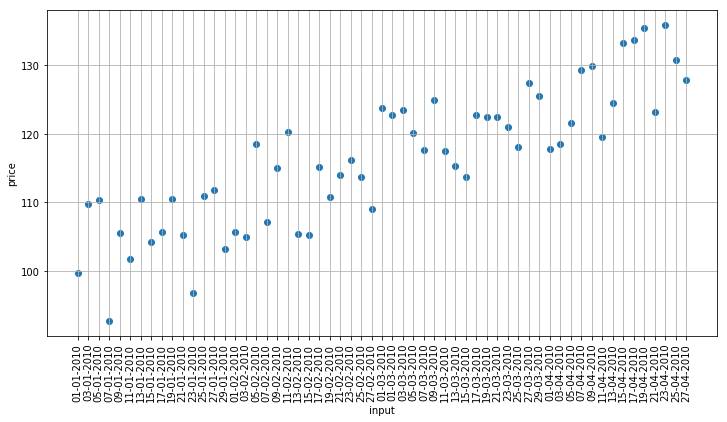

In [5]:
fig,axes=plt.subplots(figsize=(12,6))
axes.scatter(df["input"],df["price"])
axes.set_xlabel("input")
axes.set_ylabel("price")
plt.xticks(list(df["input"]),list(df["date"]),rotation=90)
grid()
show()

### 2. Calculate mean and standard deviation of price. Find out outliers(value greater than 1.5 standard deviations) in your data. List them down. 

In [6]:
print(df[abs(df["price"]-df["price"].mean())>1.5])
df[abs(df["price"]-df["price"].mean())>1.5].shape

    input        date       price
0       1  01-01-2010   99.722049
1       3  03-01-2010  109.727295
2       5  05-01-2010  110.343276
3       7  07-01-2010   92.669619
4       9  09-01-2010  105.517622
5      11  11-01-2010  101.761472
6      13  13-01-2010  110.510962
7      15  15-01-2010  104.142596
8      17  17-01-2010  105.662342
9      19  19-01-2010  110.512167
10     21  21-01-2010  105.198664
11     23  23-01-2010   96.741469
12     25  25-01-2010  110.932203
13     27  27-01-2010  111.747339
14     29  29-01-2010  103.137583
15     31  01-02-2010  105.720219
16     33  03-02-2010  105.008099
17     35  05-02-2010  118.548400
18     37  07-02-2010  107.143262
20     41  11-02-2010  120.313890
21     43  13-02-2010  105.362041
22     45  15-02-2010  105.240631
24     49  19-02-2010  110.835647
25     51  21-02-2010  113.913818
27     55  25-02-2010  113.710047
28     57  27-02-2010  108.983732
29     59  01-03-2010  123.718917
30     61  01-03-2010  122.813400
31     63  03-

(52, 3)

### 3. Filter out rows in your dataset, whose price is greater than 1.5 standard deviations.<br> Plot a scatter of input vs price, with outliers in a different color.

input      7
date       7
price      7
std_var    7
dtype: int64


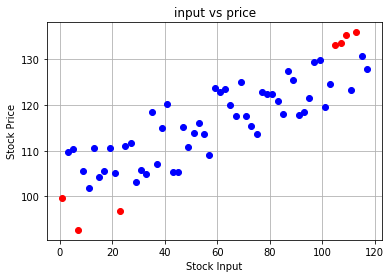

In [9]:
mean = df['price'].mean()
std = df['price'].std()
df['std_var'] = abs(df['price'] - mean)/std
df2 = df[df['std_var'] > 1.5]
df2
print(df2.count())

df['std_var'] = abs(df['price'] - mean)/std
dfOutliers = df[df['std_var'] < 1.5]

plt.figure()
plt.grid()
plt.plot(df2['input'], df2['price'],'ro')
plt.plot(dfOutliers['input'], dfOutliers['price'],'bo')
plt.xlabel("Stock Input")
plt.ylabel("Stock Price")
plt.title("input vs price")
plt.show()

### 4. Now split your data in Test & Training input. Perform a 75:25 split, i.e first 3 month data is training set, and last 1 month data is test. Perform linear regression on the training data. Plot the line on a graph along with a scatter of input and price of the training dataset. 

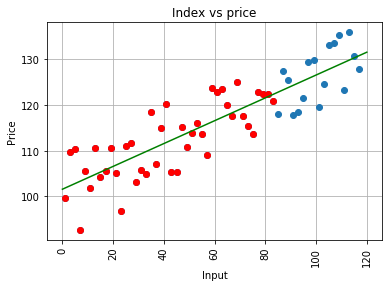

In [10]:
plt.figure()
plt.plot(df["input"],df["price"],ls="None",marker="o")
plt.xticks(rotation=90)
plt.title("Index vs price")
X_train,X_test,y_train,y_test=df["input"][:42],df["input"][42:],df["price"][:42],df["price"][42:]
#Plot the test(blue) and the train(red) values
plt.plot(X_train,y_train,ls="None",marker='o',color='r')
plt.xlabel("Input")
plt.ylabel("Price")
lm=LinearRegression()
lm_model=lm.fit(X_train.values.reshape(-1,1),y_train)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
obtained_y_test=lm.predict([[0],[80],[120]])
#Linear Regression Line
plt.plot([0,80,120],obtained_y_test,color='g')
plt.grid()
plt.show()

### 5. Predict the prices using the test dataset. Plot a scatter of test price vs obtained price. <br>Find the MSE of predicted output & test output. Obtained the R^2 score of model. 

MSE is 24.060106 
score is  0.588513310737826


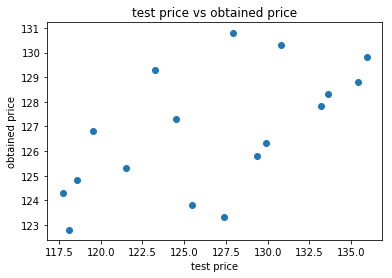

In [17]:
figure()
plt.scatter(y_test.values,lm.predict(X_test.values.reshape(-1,1)))
plt.title("test price vs obtained price")
plt.xlabel("test price")
plt.ylabel("obtained price")
obtained_y_test=lm.predict(X_test.values.reshape(-1,1))
mse=mean_squared_error(y_true=y_test,y_pred=obtained_y_test)
print("MSE is %f "%mse)

print("score is ",lm.score(X_train.values.reshape(-1,1),y_train))

### 6. Now split your data with a 75:25 ratio using the train_test_split function, use random state as 25.<br> Perform steps 5 & 6 over this split and compare your answers. 

[101.1461658  131.77446702]


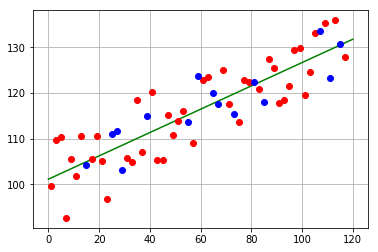

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['input'],df['price'], test_size = 0.25,random_state=25)

model1 = LinearRegression()
model1.fit(X_train.values.reshape(-1,1),Y_train)

obtained_y_test = model1.predict([[0],[120]])
print(obtained_y_test)
plt.plot([0,120],obtained_y_test,color="g")
plt.grid()

plt.plot(X_train,Y_train,ls="None",marker="o",color="r")
plt.plot(X_test,Y_test,ls="None",marker="o",color="b")

In [25]:
from sklearn.metrics import mean_squared_error
obt_Y_test = model1.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_true=Y_test,y_pred=obt_Y_test)
print(mse)
model1.score(X_test.values.reshape(-1,1),Y_test)

16.200241249274427


0.7629705197164744

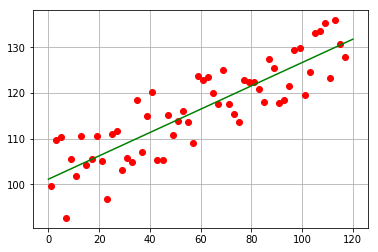

In [26]:
obtained_y_test = model1.predict([[0],[120]])
obtained_y_test

plt.plot(df['input'],df['price'],ls='None',marker='o',color='r')
plt.plot([0,120],obtained_y_test,color='g')
plt.grid()
plt.show()

### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

x=df["input"].values.reshape(-1,1)
y=df["price"]
for i in range(3,11):
    scores = cross_val_score(lm, x, y, cv = i)
    print("Cross-validated scores is {}  ".format(scores))
    print("Accuracy :%0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2),"\n")

Cross-validated scores is [0.15397105 0.28383308 0.36530456]  
Accuracy :0.27 (+/- 0.17) 

Cross-validated scores is [-0.0119183   0.14581173 -0.14226966  0.29878648]  
Accuracy :0.07 (+/- 0.33) 

Cross-validated scores is [-0.10303747  0.02721154  0.1947893  -0.49526123 -0.1876169 ]  
Accuracy :-0.11 (+/- 0.46) 

Cross-validated scores is [-0.08727052  0.12107373  0.07687873 -0.49030289  0.09589154  0.07209612]  
Accuracy :-0.04 (+/- 0.43) 

Cross-validated scores is [-0.06352265  0.0532161   0.01427428 -0.07941022 -0.26455556 -0.21567559
 -0.39365852]  
Accuracy :-0.14 (+/- 0.30) 

Cross-validated scores is [-0.06463562 -0.20854131 -0.02945115  0.20598365 -0.45503286  0.07637965
 -0.47883145 -0.89273007]  
Accuracy :-0.23 (+/- 0.67) 

Cross-validated scores is [-0.06769439  0.06691853  0.2120898  -0.08397851 -0.29529819  0.06834661
 -0.63003932  0.0851553  -0.44518346]  
Accuracy :-0.12 (+/- 0.53) 

Cross-validated scores is [-0.07249248 -0.28825933  0.03399844 -0.04946416  0.1331505